In [1]:
import torch

from matplotlib import pyplot as plt

from BoardDetector_YOLO import BoardDetector_YOLO

In [2]:
bd = BoardDetector_YOLO()

In [3]:
img = torch.tensor(plt.imread("../data/image_0.jpg"))
# img = torch.tensor(plt.imread("../data/data_manual/1741715439429.jpg"))

img.shape, img.dtype, img.max()

(torch.Size([3024, 3024, 3]), torch.uint8, tensor(255, dtype=torch.uint8))

In [4]:
bd.set_img(img)
mask, conf = bd.predict()
conf


0: 640x640 1 chessboard, 70.0ms
Speed: 1.5ms preprocess, 70.0ms inference, 158.2ms postprocess per image at shape (1, 3, 640, 640)


0.9553796648979187

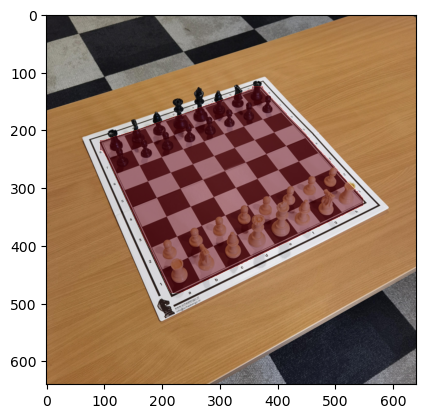

In [5]:
bd.plot_mask()

In [6]:
import importlib
import BoundedCornerExtractor
importlib.reload(BoundedCornerExtractor);

In [7]:
img_gray = img.numpy()

CE = BoundedCornerExtractor.BoundedCornerExtractor()

In [8]:
# %%timeit

CE.setImg(img_gray, mask)
CE.apply()
# M, mask_fit, error, iou_error = CE.fitBoard()

In [9]:
# %%timeit
M, corners, mask_fit, error = CE.fitBoard()

(0.07040226459503174,
 tensor([[ 451.5206, 1060.3992],
         [1735.2749,  632.3293],
         [2563.6028, 1536.3629],
         [1035.8461, 2289.6538]]))

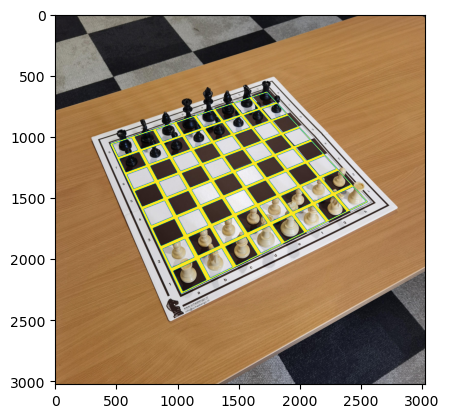

In [10]:
plt.imshow(img);
plt.imshow(mask_fit, alpha=mask_fit);
# plt.imshow(mask, alpha=mask*.5, cmap='Reds')
error, corners